# **Multiple Linear Regression**

Multiple Linear Regression (MLR) is a supervised machine learning algorithm and a foundational statistical technique used to predict the value of a continuous dependent variable based on the values of two or more independent variables. It's an extension of simple linear regression, which only uses one independent variable.

# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
#loading the data
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Python excelr/ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.isnull().sum() #for missing values

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


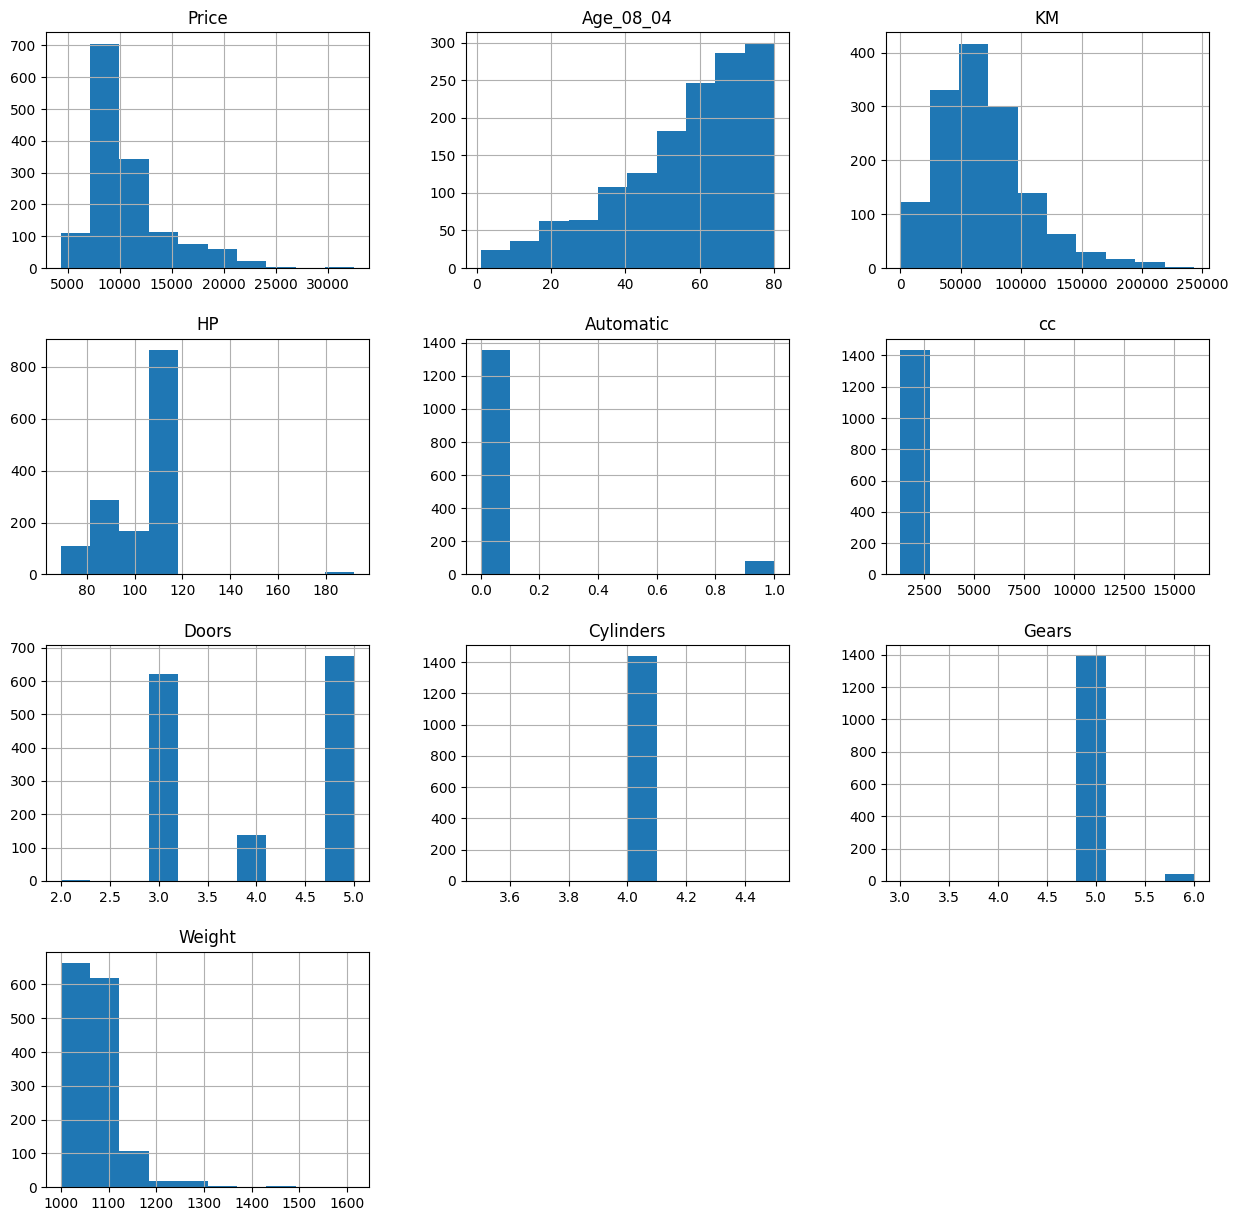

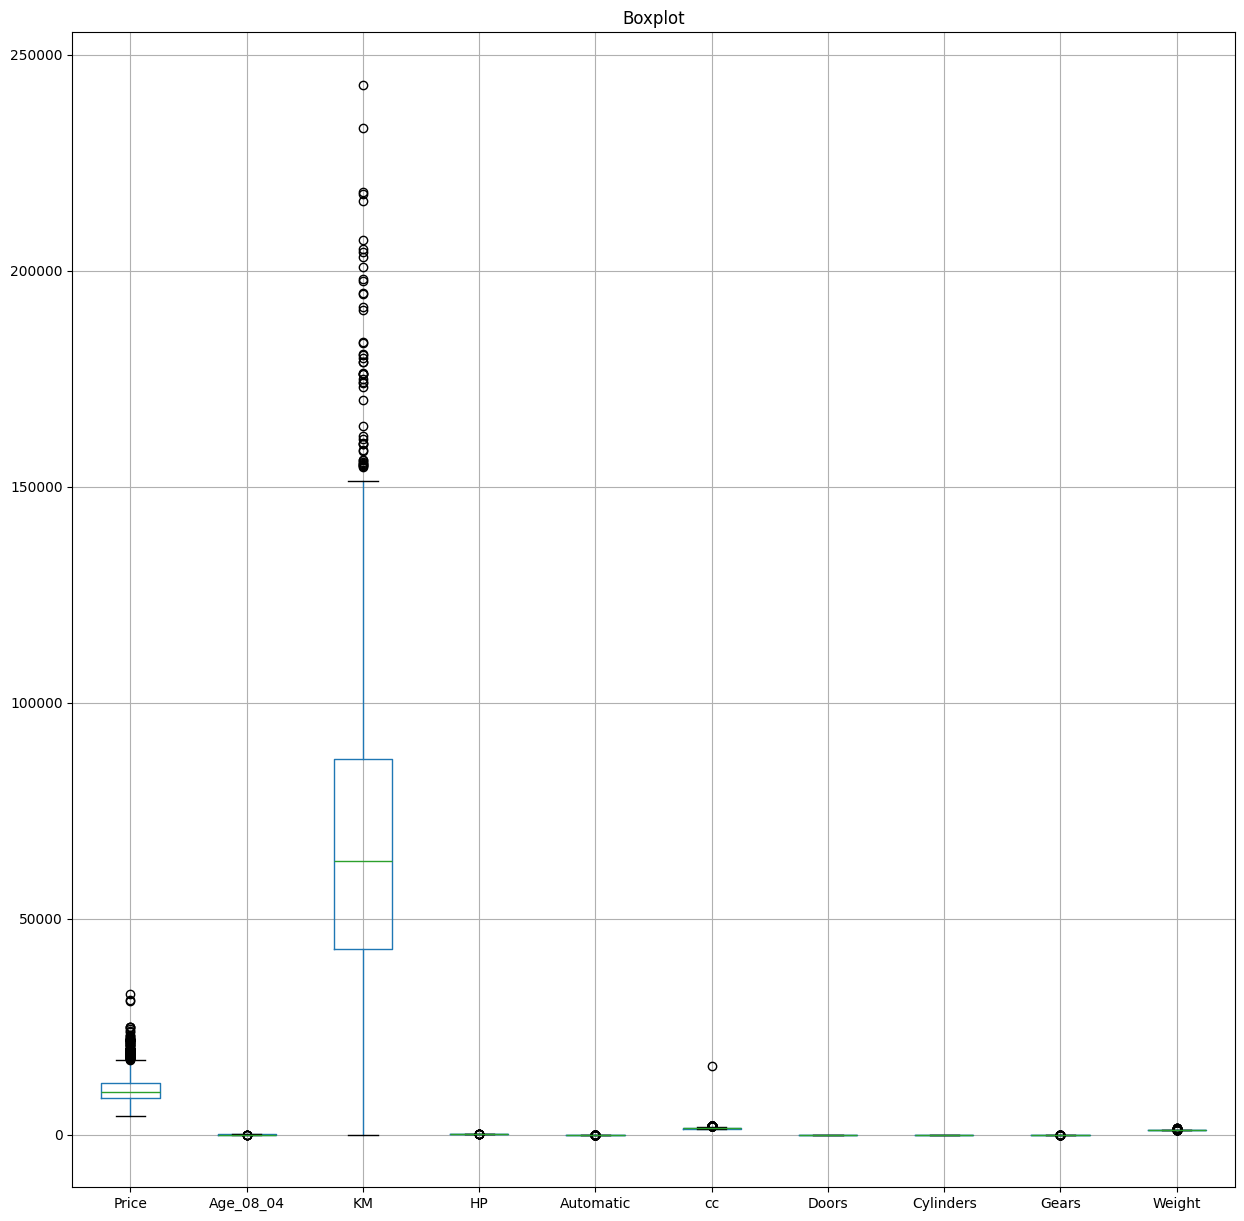

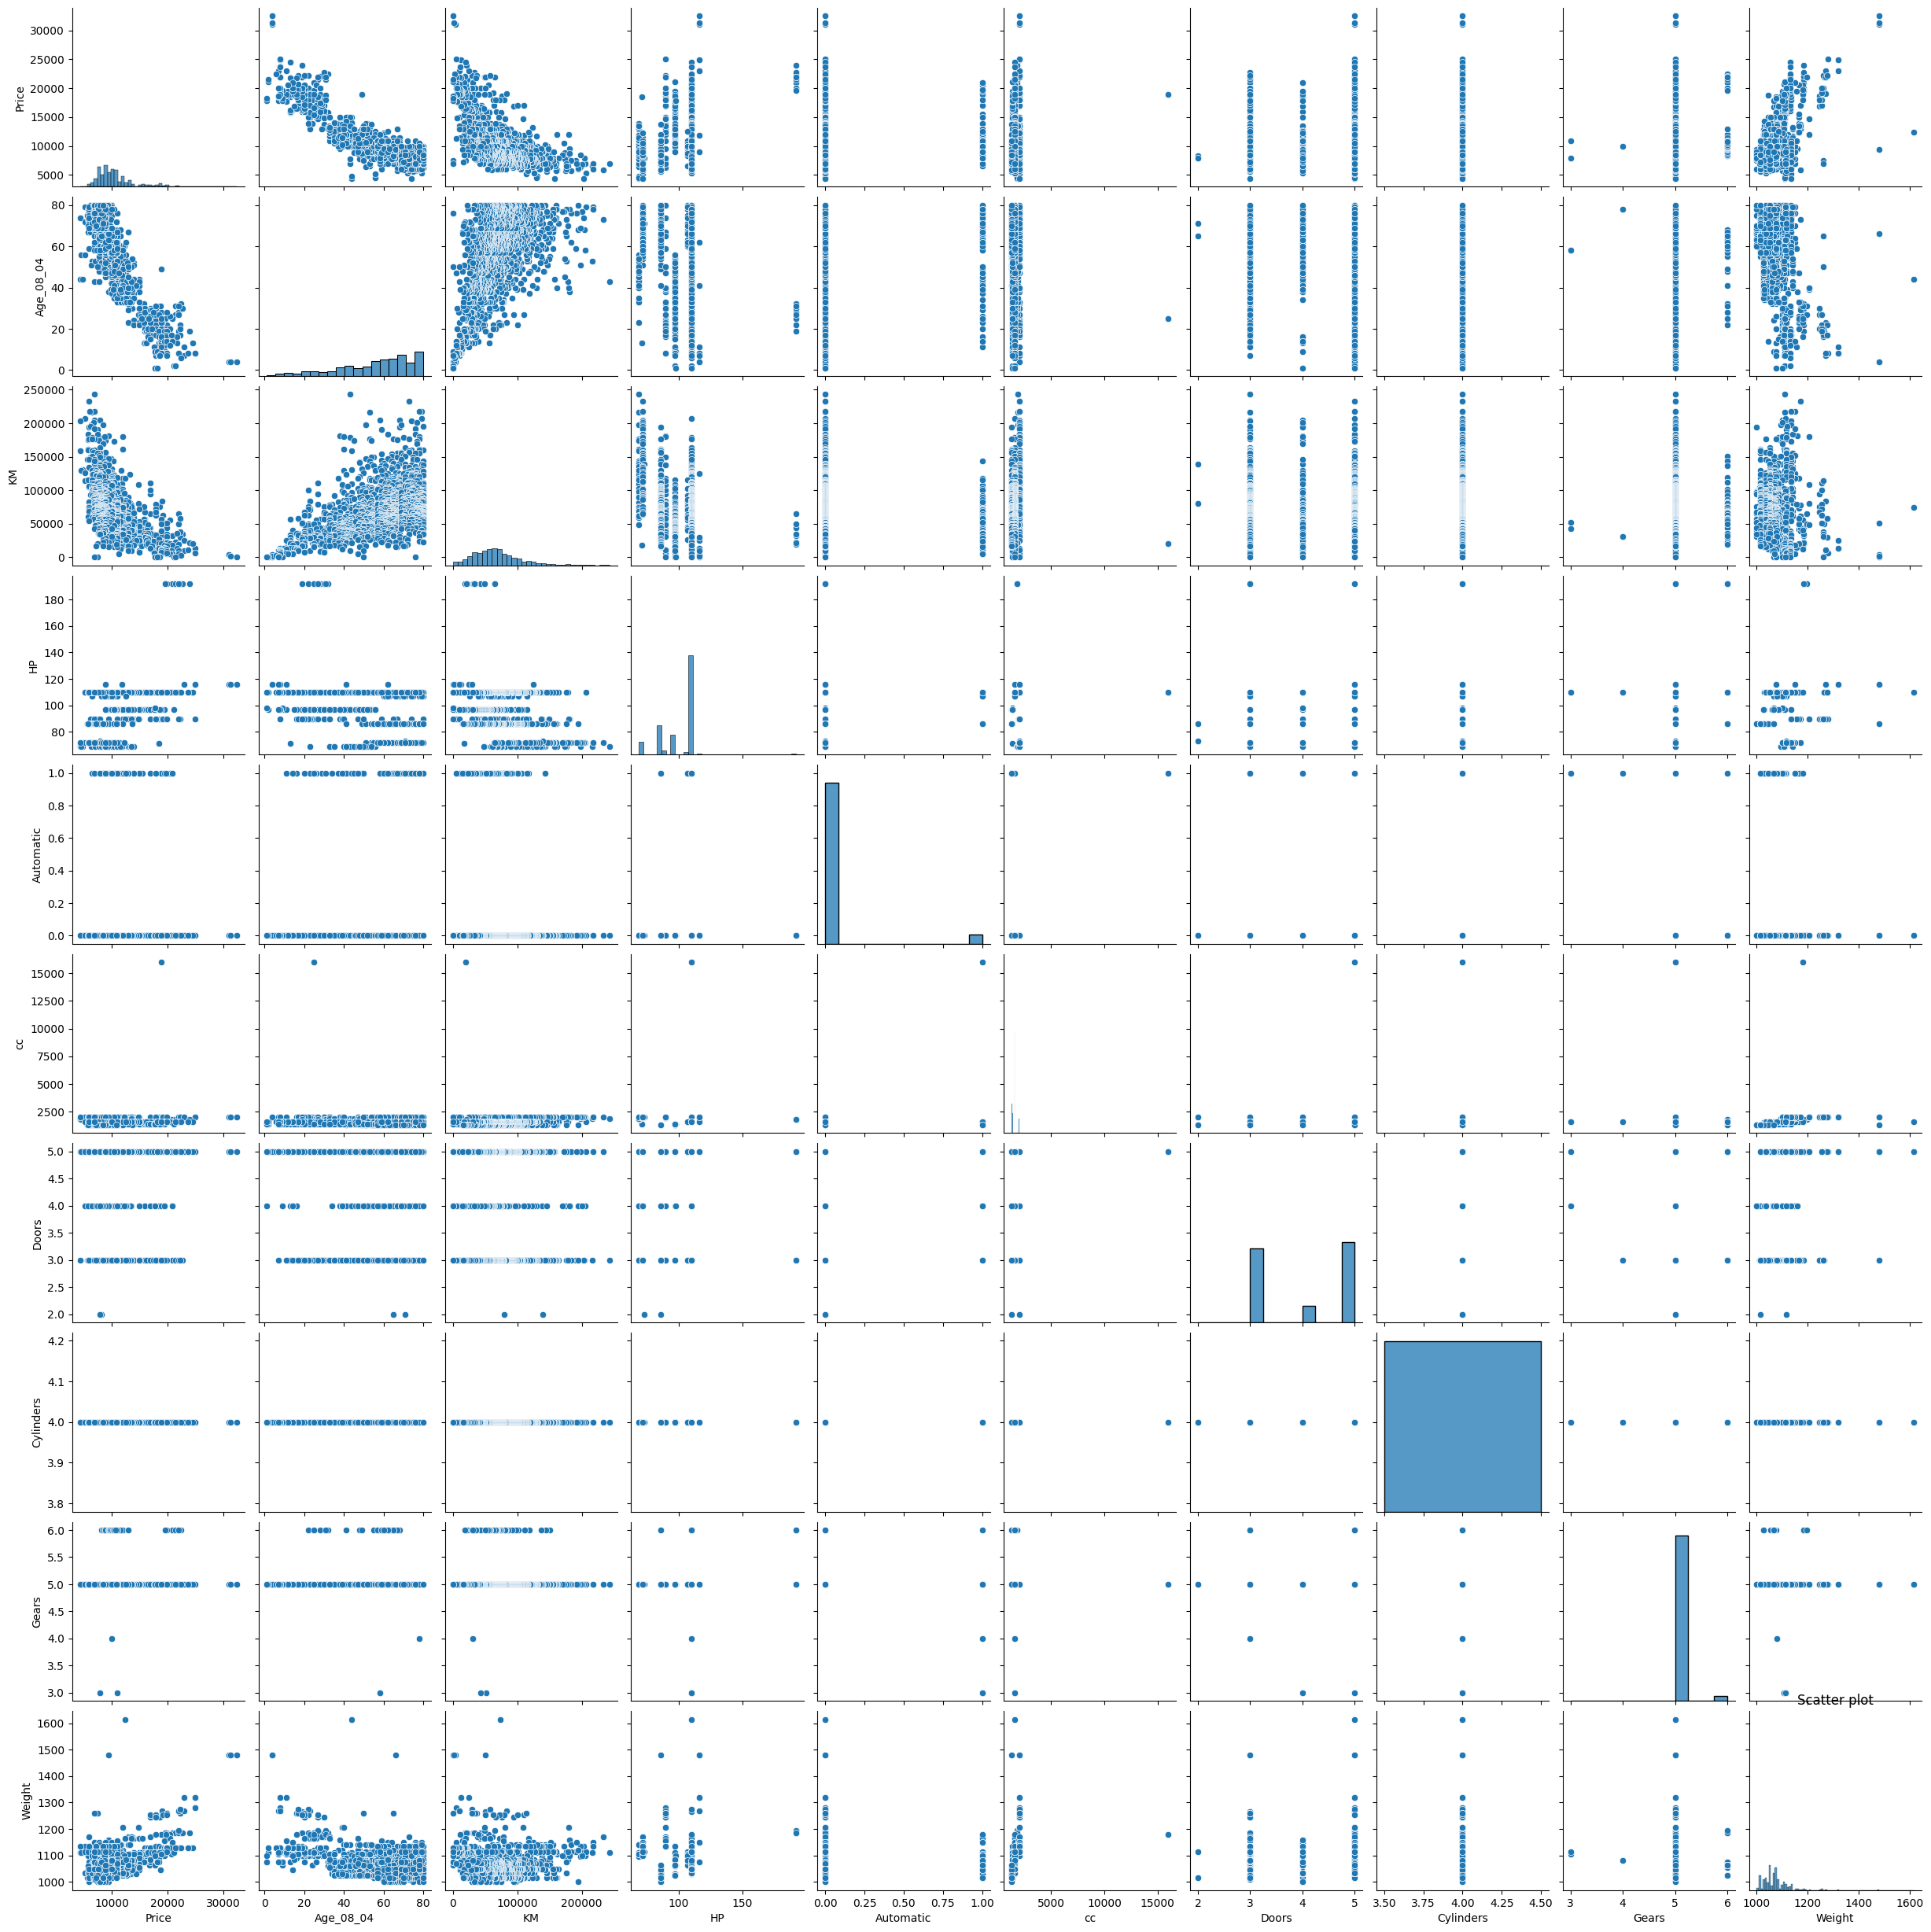

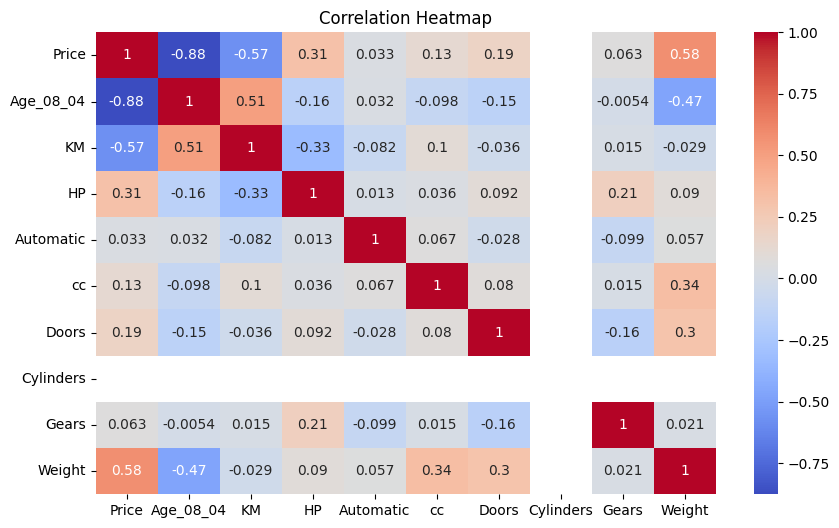

In [7]:
#data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#histogram
df.hist(figsize=(15,15))
plt.title("Histogram")
plt.show()

#boxplot
df.boxplot(figsize=(15,15))
plt.title("Boxplot")
plt.show()

#scatterplot
sns.pairplot(df)
plt.title("Scatter plot")
plt.show()

#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
#preprocessing
# Rename columns for consistency
df.rename(columns={
    'Age_08_04': 'Age',
    'Fuel_Type': 'FuelType',
    'cc': 'CC',
    'Weight': 'Weight',
    'Price': 'Price'
}, inplace=True)

In [9]:
# One-hot encode categorical variable FuelType
df_encoded = pd.get_dummies(df, columns=['FuelType'], drop_first=True)
df_encoded

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [12]:
from sklearn.model_selection import train_test_split

# separate features and target
X = df_encoded.drop(columns='Price')
y = df_encoded['Price']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1148, 11) (288, 11) (1148,) (288,)


# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# model building function
def build_model(X_train, y_train, X_test, y_test, model_name):
    model = LinearRegression()  # create linear regression model
    model.fit(X_train, y_train)  # fit model on training data
    r2 = model.score(X_test, y_test)  # calculate r2 score on test data
    print(f"\n {model_name}")
    print(f"R² Score: {r2:.4f}")  # print r2 score
    print("Intercept:", model.intercept_)
    print("Coefficients:\n", pd.Series(model.coef_, index=X_train.columns))
    return model

# 1: all features
model1 = build_model(X_train, y_train, X_test, y_test, "1: All Features")  # build model using all features

# 2: exclude gears and cylinders
X_train2 = X_train.drop(columns=['Gears', 'Cylinders'])  # drop gears and cylinders from training data
X_test2 = X_test.drop(columns=['Gears', 'Cylinders'])  # drop gears and cylinders from test data
model2 = build_model(X_train2, y_train, X_test2, y_test, "2: No Gears and Cylinders")  # build model with reduced features

# 3: only top correlated features
top_features = ['Age', 'KM', 'Weight', 'FuelType_Diesel']  # define top correlated features
X_train3 = X_train[top_features]  # select top features from training data
X_test3 = X_test[top_features]  # select top features from test data
model3 = build_model(X_train3, y_train, X_test3, y_test, "3: Top Correlated Features")  # build model using top features



 1: All Features
R² Score: 0.8349
Intercept: -14255.385993565254
Coefficients:
 Age               -1.208305e+02
KM                -1.623141e-02
HP                 1.403948e+01
Automatic          1.488309e+02
CC                -3.037219e-02
Doors             -6.031097e+01
Cylinders         -1.620037e-12
Gears              5.516007e+02
Weight             2.588496e+01
FuelType_Diesel   -6.854876e+01
FuelType_Petrol    1.370809e+03
dtype: float64

 2: No Gears and Cylinders
R² Score: 0.8333
Intercept: -11856.940449151614
Coefficients:
 Age                -120.823078
KM                   -0.015927
HP                   15.777213
Automatic            93.081993
CC                   -0.030236
Doors               -84.483547
Weight               26.069186
FuelType_Diesel       4.202110
FuelType_Petrol    1453.694461
dtype: float64

 3: Top Correlated Features
R² Score: 0.8219
Intercept: -10885.044316278349
Coefficients:
 Age                -118.962372
KM                   -0.017638
Weight       

# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n {model_name} Evaluation")
    print("R² Score       :", r2_score(y_test, y_pred))
    print("MAE            :", mean_absolute_error(y_test, y_pred))
    print("MSE            :", mean_squared_error(y_test, y_pred))
    print("RMSE           :", np.sqrt(mean_squared_error(y_test, y_pred)))

# Evaluate all three models
evaluate_model(model1, X_test, y_test, "1: All Features")
evaluate_model(model2, X_test2, y_test, "2: No Gears & Cylinders")
evaluate_model(model3, X_test3, y_test, "3: Top Correlated Features")


 1: All Features Evaluation
R² Score       : 0.8348888040611082
MAE            : 990.8872739193926
MSE            : 2203043.8231437025
RMSE           : 1484.2654153296514

 2: No Gears & Cylinders Evaluation
R² Score       : 0.8332952678447363
MAE            : 992.30133944774
MSE            : 2224306.0403935453
RMSE           : 1491.410755088465

 3: Top Correlated Features Evaluation
R² Score       : 0.8218689722469819
MAE            : 994.0880614393259
MSE            : 2376764.6898201015
RMSE           : 1541.6759354092874


# 5.Apply Lasso and Ridge methods on the model.

Lasso (L1) and Ridge (L2) are regularization techniques that prevent overfitting in regression models by penalizing large coefficients. Lasso uses the absolute value penalty, which performs feature selection by setting some coefficients exactly to zero. Ridge uses the squared penalty, which shrinks all coefficients toward zero but does not eliminate any features.

In [15]:
#importing libraries
from sklearn.linear_model import Ridge, Lasso

# Define and train Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test, "Ridge Regression")


 Ridge Regression Evaluation
R² Score       : 0.8351359377712336
MAE            : 990.7338342026006
MSE            : 2199746.3702333393
RMSE           : 1483.1541963778882


In [16]:
# Define and train Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
evaluate_model(lasso, X_test, y_test, "Lasso Regression")


 Lasso Regression Evaluation
R² Score       : 0.8348946076447358
MAE            : 990.8879478176821
MSE            : 2202966.387152823
RMSE           : 1484.2393294724484


In [17]:
print("\nLasso Coefficients:")
print(pd.Series(lasso.coef_, index=X_train.columns))


Lasso Coefficients:
Age                -120.830134
KM                   -0.016232
HP                   14.044676
Automatic           148.676633
CC                   -0.030392
Doors               -60.294596
Cylinders             0.000000
Gears               551.306478
Weight               25.883328
FuelType_Diesel     -68.186362
FuelType_Petrol    1370.744742
dtype: float64


# Interview Questions:


1. Normalization & Standardization and How they are helpful

Normalization and standardization are core feature scaling methods in data preprocessing, necessary to ensure all numerical features contribute equally to a model, regardless of their original range. This is helpful because it prevents features with large magnitudes (e.g., income) from unfairly dominating algorithms that rely on distance metrics (KNN, K-Means) or magnitude of features (Gradient Descent).
* Normalization (Min-Max Scaling): Scales data to a fixed range, typically 0 to 1. It's often used when the data distribution is unknown or non-Gaussian, and for models like Neural Networks that prefer inputs in a specific range.
* Standardization (Z-Score Scaling): Scales data to have a mean of 0 and a standard deviation of 1. It's useful when the data is approximately normally distributed and is essential for algorithms sensitive to feature scale, like PCA and L1/L2 regularized models.



---


2. Techniques to Address Multicollinearity in Multiple Linear Regression

Multicollinearity,where two or more predictor variables are highly correlated—causes unstable and unreliable coefficient estimates in a linear regression model. Techniques to address this include:
1. Remove or Combine Predictors:
    * Remove Highly Correlated Variables: Identify the problematic features using the Variance Inflation Factor (VIF) score (typically a VIF >5 indicates an issue) and remove one of the highly correlated variables.
    * Principal Component Analysis (PCA): Transform the correlated features into a smaller set of new, uncorrelated variables (principal components), retaining most of the predictive information.
2. Use Regularization Methods:
    * Ridge Regression (L2): The most common fix. It stabilizes the coefficient estimates by shrinking them, distributing the effect across correlated variables without removing any from the model.
    * Lasso Regression (L1): Can also be used, as it performs automatic feature selection by setting the coefficients of redundant predictors exactly to zero.